# Conhecendo a base de dados

## Importando os dados

In [108]:
import pandas as pd

# Alguns df's não vem com o separador padrão, então temos que setar qual é 
df = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/pandas-conhecendo-a-biblioteca/main/base-de-dados/aluguel.csv", sep=";")
df.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN


## Características gerais dos dados

In [109]:
# Analisando as linhas e colunas
f'Linhas: {df.shape[0]}, Colunas: {df.shape[1]}'

'Linhas: 32960, Colunas: 9'

In [110]:
# Analisando as colunas
df.columns

Index(['Tipo', 'Bairro', 'Quartos', 'Vagas', 'Suites', 'Area', 'Valor',
       'Condominio', 'IPTU'],
      dtype='object')

Vendo as colunas temos que já começar a entender que tipo de dados elas vão ter, a importância, ordem e fatores sobre esses dados (e se são coerentes com os nomes das colunas)

In [111]:
# Para termos melhor visualização dos tipos de dados nas colunas usamos:
# Dados do tipo object: 99% das vezes são strings.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32960 entries, 0 to 32959
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tipo        32960 non-null  object 
 1   Bairro      32960 non-null  object 
 2   Quartos     32960 non-null  int64  
 3   Vagas       32960 non-null  int64  
 4   Suites      32960 non-null  int64  
 5   Area        32960 non-null  int64  
 6   Valor       32943 non-null  float64
 7   Condominio  28867 non-null  float64
 8   IPTU        22723 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 2.3+ MB


### Desafio!
1. Importar arquivo alunos.csv
2. Visualizar as 7 primeiras linhas e as 5 últimas
3. Verificar quantidade de linhas e colunsa
4. Verificar tipos de dados das colunas e printalos
5. Calcular estatísticas básicas das colunas

In [ ]:
df_alunos = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/pandas-conhecendo-a-biblioteca/main/desafios/alunos.csv")

df_alunos.head(7)

In [ ]:
df_alunos.tail(5)

In [ ]:
print("Quantia de colunas: ", len(df_alunos.columns), " quantia de linhas: ", len(df_alunos.index))

In [ ]:
df_alunos.info()

# Nome -> string
# Idade -> inteiro
# Notas -> decimal
# Aprovado -> booleano

In [ ]:
import matplotlib.pyplot as plt
# Podemos usar o .describe() para fazer o automático mas vou gerar na mão

notas_aprovados = df_alunos.query("Aprovado == True")
notas_reprovados = df_alunos.query("Aprovado == False")
print(f"Média das notas dos aprovados: {notas_aprovados.Notas.mean()}")
print(f"Média das notas dos reprovados: {notas_reprovados.Notas.mean()}")
print(f"Média das notas gerais: {df_alunos.Notas.mean()}")
print(f"Mediana das notas gerais: {df_alunos.Notas.median()}")

# Frequência de notas da turma
df_alunos.plot.hist(x="Idade")

# Análise exploratória

Qual o valor médio de aluguel por tipo de imóvel?

In [112]:
df.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN


In [113]:
# Colunas importantes: tipos e valor
round(df.Valor.mean(), 3)

12952.66

In [114]:
# Precisamos agrupar os dados de media de valor pelo tipo de imóvel
# ou seja, agrupamos nosso df sempre por tipo,fazendo a média apenas dos numéricos
df.groupby('Tipo').mean(numeric_only=True)['Valor']

Tipo
Apartamento                      4744.614648
Box/Garagem                      1899.756098
Casa                             6793.454922
Casa Comercial                  14478.264151
Casa de Condomínio              11952.061245
Casa de Vila                     1574.369478
Chácara                          4900.000000
Conjunto Comercial/Sala         14715.045521
Flat                             4546.189076
Galpão/Depósito/Armazém         53407.062600
Hotel                           25000.000000
Indústria                      120000.000000
Loft                             2557.882353
Loja Shopping/ Ct Comercial      8126.178862
Loja/Salão                      13769.646770
Loteamento/Condomínio           22000.000000
Pousada/Chalé                    1480.000000
Prédio Inteiro                 498637.239203
Quitinete                        1246.840909
Studio                           2400.000000
Sítio                           12499.000000
Terreno Padrão                  32567.714286
Name:

In [115]:
# Para uma melhor visualização, vamos transformar a series em um df.
preco_tipo = df.groupby('Tipo')[['Valor']].mean().sort_values('Valor')
print(preco_tipo)

                                     Valor
Tipo                                      
Quitinete                      1246.840909
Pousada/Chalé                  1480.000000
Casa de Vila                   1574.369478
Box/Garagem                    1899.756098
Studio                         2400.000000
Loft                           2557.882353
Flat                           4546.189076
Apartamento                    4744.614648
Chácara                        4900.000000
Casa                           6793.454922
Loja Shopping/ Ct Comercial    8126.178862
Casa de Condomínio            11952.061245
Sítio                         12499.000000
Loja/Salão                    13769.646770
Casa Comercial                14478.264151
Conjunto Comercial/Sala       14715.045521
Loteamento/Condomínio         22000.000000
Hotel                         25000.000000
Terreno Padrão                32567.714286
Galpão/Depósito/Armazém       53407.062600
Indústria                    120000.000000
Prédio Inte

<Axes: ylabel='Tipo'>

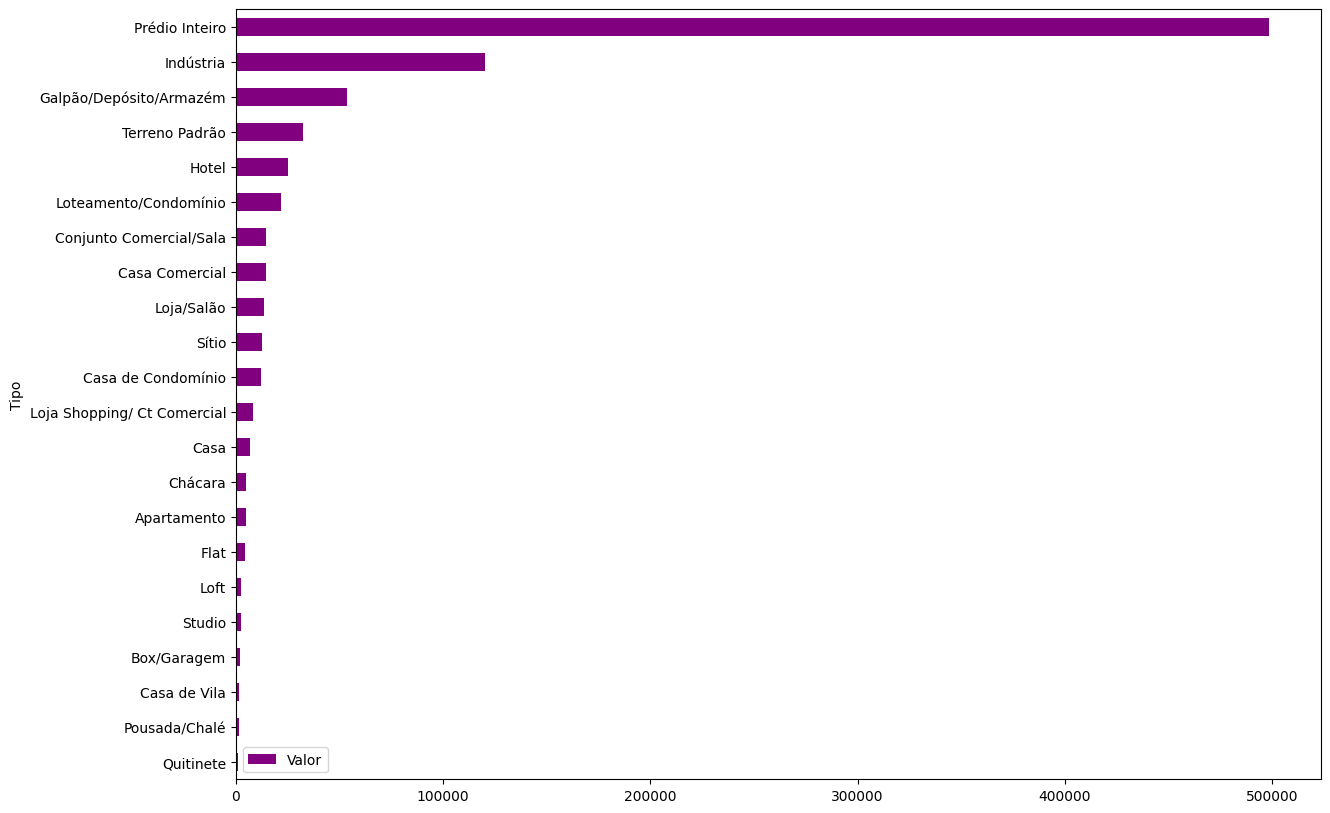

In [116]:
# Um bom ordenamento, com um agrupamento e visualização especifíca podemos fazer isso...
preco_tipo.plot(kind='barh', figsize=(14, 10), color='purple')

# Removendo os imóveis comerciais

Supondo que queremos apenas os imóveis residenciais sem ser os comerciais nos nossos dados, como fazer?

In [117]:
# Isso traz cada um dos valores únicos na coluna
df.Tipo.unique()

array(['Quitinete', 'Casa', 'Conjunto Comercial/Sala', 'Apartamento',
       'Casa de Condomínio', 'Prédio Inteiro', 'Flat', 'Loja/Salão',
       'Galpão/Depósito/Armazém', 'Casa Comercial', 'Casa de Vila',
       'Terreno Padrão', 'Box/Garagem', 'Loft',
       'Loja Shopping/ Ct Comercial', 'Chácara', 'Loteamento/Condomínio',
       'Sítio', 'Pousada/Chalé', 'Studio', 'Hotel', 'Indústria'],
      dtype=object)

In [118]:
comerciais = ('Conjunto Comercial/Sala', 'Prédio Inteiro', 'Loja/Salão',
       'Galpão/Depósito/Armazém', 'Casa Comercial', 'Terreno Padrão', 'Box/Garagem',
       'Loja Shopping/ Ct Comercial', 'Loteamento/Condomínio', 'Sítio', 'Pousada/Chalé', 'Hotel', 'Indústria')
df = df.query("@comerciais not in Tipo")

In [119]:
# Verificando quantos tipos temos
df.Tipo.unique

<bound method Series.unique of 0          Quitinete
1               Casa
3        Apartamento
4        Apartamento
5        Apartamento
            ...     
32953    Apartamento
32955      Quitinete
32956    Apartamento
32957    Apartamento
32958    Apartamento
Name: Tipo, Length: 23112, dtype: object>

<Axes: ylabel='Tipo'>

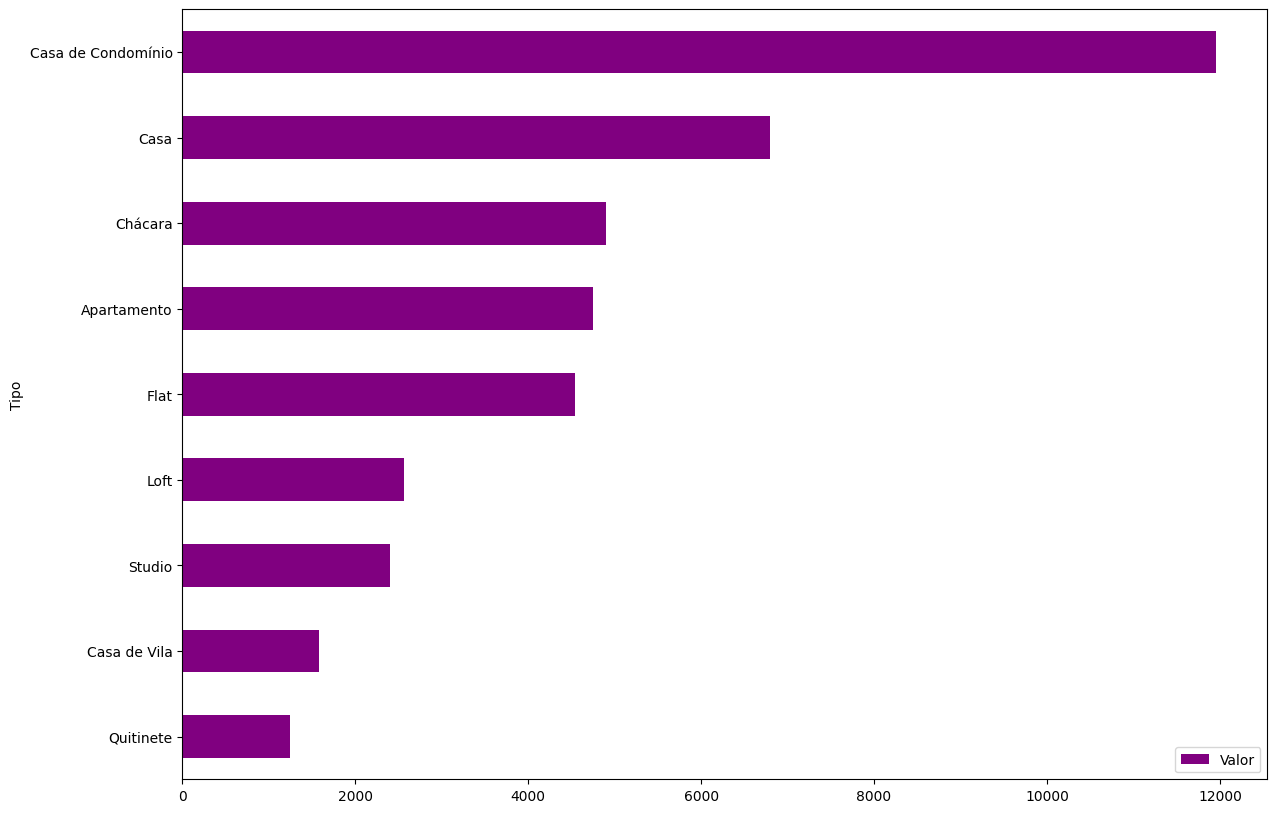

In [120]:
df_imoveis =  df.groupby('Tipo')[['Valor']].mean().sort_values('Valor')
df_imoveis.plot(kind='barh', figsize=(14, 10), color='purple')

E se quisermos saber qual o percentual de cada tipo de imóvel em nossa base (agora já refatorada)?    

In [121]:
df.Tipo.unique

<bound method Series.unique of 0          Quitinete
1               Casa
3        Apartamento
4        Apartamento
5        Apartamento
            ...     
32953    Apartamento
32955      Quitinete
32956    Apartamento
32957    Apartamento
32958    Apartamento
Name: Tipo, Length: 23112, dtype: object>

In [148]:
# Jeito raiz de verificar os percentuais
percentuais = []
total = df.Tipo.value_counts().sum()
for quantia in df.Tipo.value_counts():
       percentuais.append(quantia / total)
[f"{round(percentual * 100,2)}%" for percentual in percentuais]

['84.51%',
 '4.31%',
 '4.18%',
 '3.62%',
 '2.06%',
 '1.08%',
 '0.22%',
 '0.02%',
 '0.0%']

In [154]:
# Jeito bom de fazer os percentuais, usando o "normalize"
df_percentual_tipos = df.Tipo.value_counts(normalize=True).to_frame().sort_values("proportion")

<Axes: xlabel='Tipos', ylabel='Percentual'>

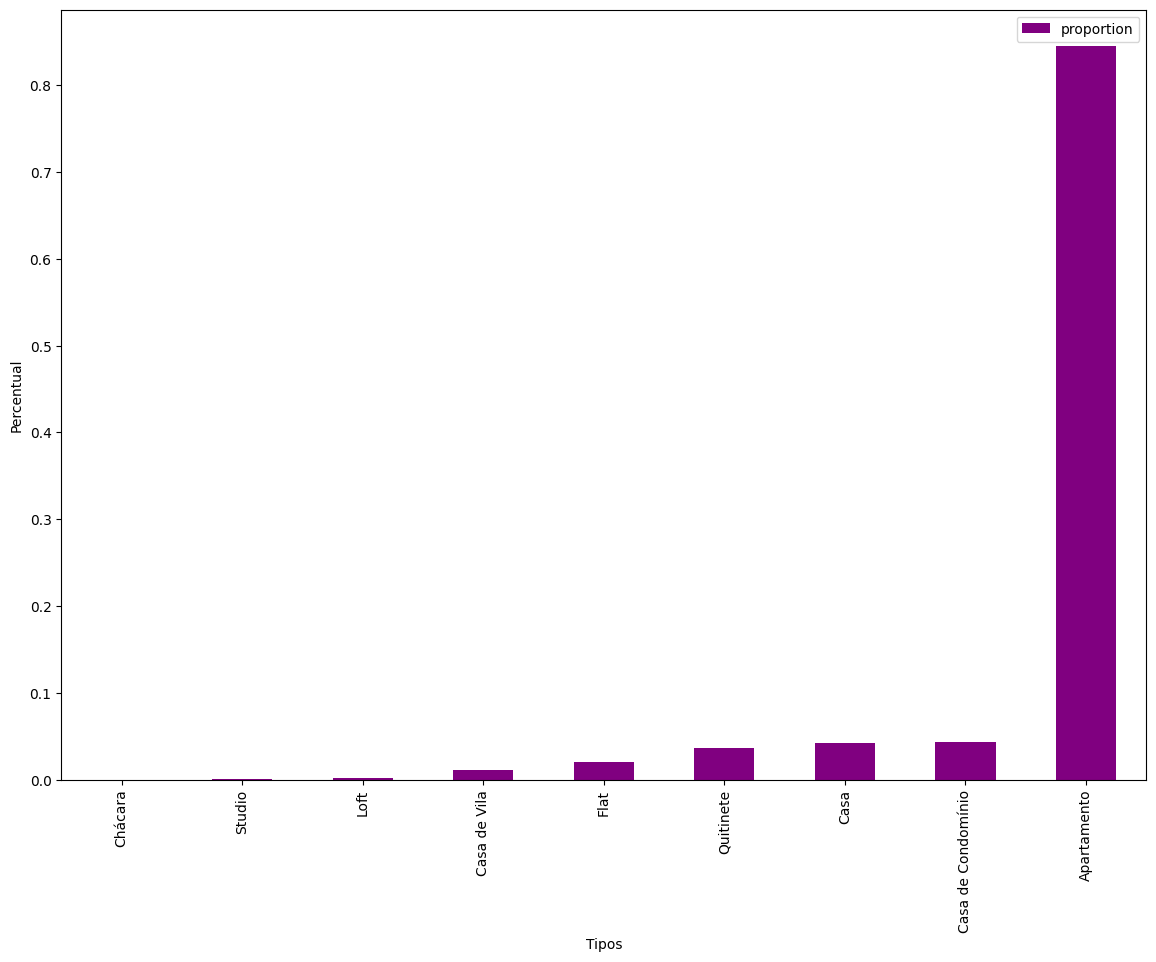

In [156]:
df_percentual_tipos.plot(kind='bar', figsize=(14, 10), color='purple',
                         xlabel='Tipos', ylabel='Percentual')

Notamos a massiva superioridade dos apartamentos, com isso vale pesquisarmos mais a fundo sobre eles no nosso banco de dados...

In [175]:
df = df.query("Tipo == 'Apartamento'")
df.Valor.mean()

4805.295740149095

# Tratamento de dados nulos

In [176]:
df.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
11,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0
12,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0


In [177]:
# Nos traz a quantidade de dados nulos existentes em cada coluna
df.isnull().sum()

Tipo          0
Bairro        0
Quartos       0
Vagas         0
Suites        0
Area          0
Valor         0
Condominio    0
IPTU          0
dtype: int64

Agora temos que pensar na abordagem de tratamento desses valores nulos, podemos ver que todas colunas com valores nulos, então podemos utilizar o 0. Isso deve ser pensando e discutido com o time de dados de como lidar da melhor forma.

In [178]:
# Ele pega cada valor NaN ou Null e transforma no valor do p. passado
df = df.fillna(0)
df.isnull().sum()

Tipo          0
Bairro        0
Quartos       0
Vagas         0
Suites        0
Area          0
Valor         0
Condominio    0
IPTU          0
dtype: int64

Algumas outras formas de tratar dados nulos:
* dropna() isso remove as linhas ou colunas com dados nulos.
* interpolate() esse preenche o valor nulo baseado no valor do "vizinho não nulo".

# Removendo registros não necessários

Alguns registros como com o aluguel 0 ou o valor do condomínio igual a 0 não são necessários para nosso df. Vamos remover eles.

In [179]:
registros_a_remover = df.query("Valor == 0 | Condominio == 0").index

# Axis -> 0: Quero remover linhas; 1: Quero remover colunas.
# Inplace = True; atualiza nosso df após isso
df.drop(registros_a_remover, axis=0, inplace=True)

In [180]:
# Verificando que foram removidas
df.query("Valor == 0 | Condominio == 0")

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU


Outras questões, em DF's obvios, como o nosso, onde temos (apos tratar) apenas um tipo (Apenas apartamentos) não é mais necessário a coluna tipo, ela apenas "suja" o DF.

In [181]:
df.Tipo.unique()

array(['Apartamento'], dtype=object)

In [182]:
df.drop('Tipo', axis=1, inplace=True)
df.head()

,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Centro,1,0,0,15,800.0,390.0,20.0
4,Higienópolis,1,0,0,48,800.0,230.0,0.0
6,Cachambi,2,0,0,50,1300.0,301.0,17.0
11,Grajaú,2,1,0,70,1500.0,642.0,74.0
12,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0


Fazendo filtragens

In [183]:
df.query('Quartos == 1 & Valor < 1200')

,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Centro,1,0,0,15,800.0,390.0,20.0
4,Higienópolis,1,0,0,48,800.0,230.0,0.0
28,Tijuca,1,0,0,48,750.0,772.0,25.0
54,Centro,1,0,0,27,750.0,371.0,19.0
94,Centro,1,1,0,37,1100.0,540.0,900.0
...,...,...,...,...,...,...,...,...
32596,Grajaú,1,0,1,37,1000.0,200.0,0.0
32617,Pechincha,1,0,1,69,900.0,640.0,126.0
32627,Glória,1,0,0,46,1100.0,453.0,32.0
32714,Botafogo,1,0,0,21,1000.0,282.0,25.0


In [184]:
df.query('Quartos >= 2 & Valor < 3000 & Area > 70')

,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
12,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0
21,Tijuca,2,1,0,110,1900.0,700.0,138.0
24,Tijuca,2,1,0,78,2000.0,700.0,0.0
32,Botafogo,2,1,0,76,2500.0,740.0,0.0
36,Recreio dos Bandeirantes,3,1,1,105,2300.0,648.0,0.0
...,...,...,...,...,...,...,...,...
32934,Jacarepaguá,2,1,1,78,2200.0,790.0,180.0
32940,Barra da Tijuca,2,1,1,85,2250.0,1561.0,197.0
32941,Barra da Tijuca,3,2,0,98,2300.0,887.0,177.0
32944,Recreio dos Bandeirantes,3,2,1,88,1550.0,790.0,0.0


# Salvando os dados

Naturalmente, após finalizar os tratamentos, visualizações e etc. Pode ser necessário salvarmos os dados novamente para podermos usar em outro notebook ou projeto, vamos la...

In [187]:
df.to_csv('data/dados_apartamentos.csv', index=False)

# E pronto! :)